In [32]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [34]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [35]:
data = pd.read_csv("src/data.csv", sep=",")

In [36]:
for i in range(len(data)):
    data.loc[i, "Previous qualification (grade)"] = data.loc[i, "Previous qualification (grade)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Curricular units 1st sem (grade)"] = str(data.loc[i, "Curricular units 1st sem (grade)"]).replace("٫", ".")
    data.loc[i, "Curricular units 2nd sem (grade)"] = data.loc[i, "Curricular units 2nd sem (grade)"].replace("٫", ".")
    # data.loc[i, "Curricular units 2nd sem (credited)"] = data.loc[i, "Curricular units 2nd sem (credited)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Unemployment rate"] = data.loc[i, "Unemployment rate"].replace("٫", ".")
    data.loc[i, "Inflation rate"] = data.loc[i, "Inflation rate"].replace("٫", ".")
    data.loc[i, "GDP"] = data.loc[i, "GDP"].replace("٫", ".")
    

In [37]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14,0,0,6,6,6,13.6666666666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0,0,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.4285714285714,0,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.3333333333333,0,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.6,0,0,6,8,5,12.6666666666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120,105,1,1,9,9,119,1,0,1,0,0,0,18,1,0,6,6,6,12,0,0,6,6,2,11,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.8,0,0,5,6,5,12,0,9.4,-0.8,-3.12,Graduate


In [44]:
data["Target"] = data["Target"].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [45]:
df = data
df = df.drop(columns=['Nacionality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation', 
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)

In [46]:
df

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,17,5,1,1,122,127.3,1,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0
1,1,15,1,1,1,160,142.5,1,0,0,1,0,19,6,6,14,0,0,6,6,6,13.6666666666667,0,2
2,1,1,5,1,1,122,124.8,1,0,0,1,0,19,6,0,0,0,0,6,0,0,0,0,0
3,1,17,2,1,1,122,119.6,1,0,1,0,0,20,6,6,13.4285714285714,0,0,6,10,5,12.4,0,2
4,2,39,1,0,1,100,141.5,0,0,1,0,0,45,6,5,12.3333333333333,0,0,6,6,6,13,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125,122.2,0,0,1,1,0,19,6,5,13.6,0,0,6,8,5,12.6666666666667,0,2
4420,1,1,2,1,1,120,119,1,1,0,0,0,18,6,6,12,0,0,6,6,2,11,0,0
4421,1,1,1,1,1,154,149.5,1,0,1,0,1,30,7,7,14.9125,0,0,8,9,1,13.5,0,0
4422,1,1,1,1,1,180,153.8,1,0,1,0,1,20,5,5,13.8,0,0,5,6,5,12,0,2


In [60]:
X = df.drop('Target', axis=1)
y = df['Target']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9872857231626525
0.2755822853247626


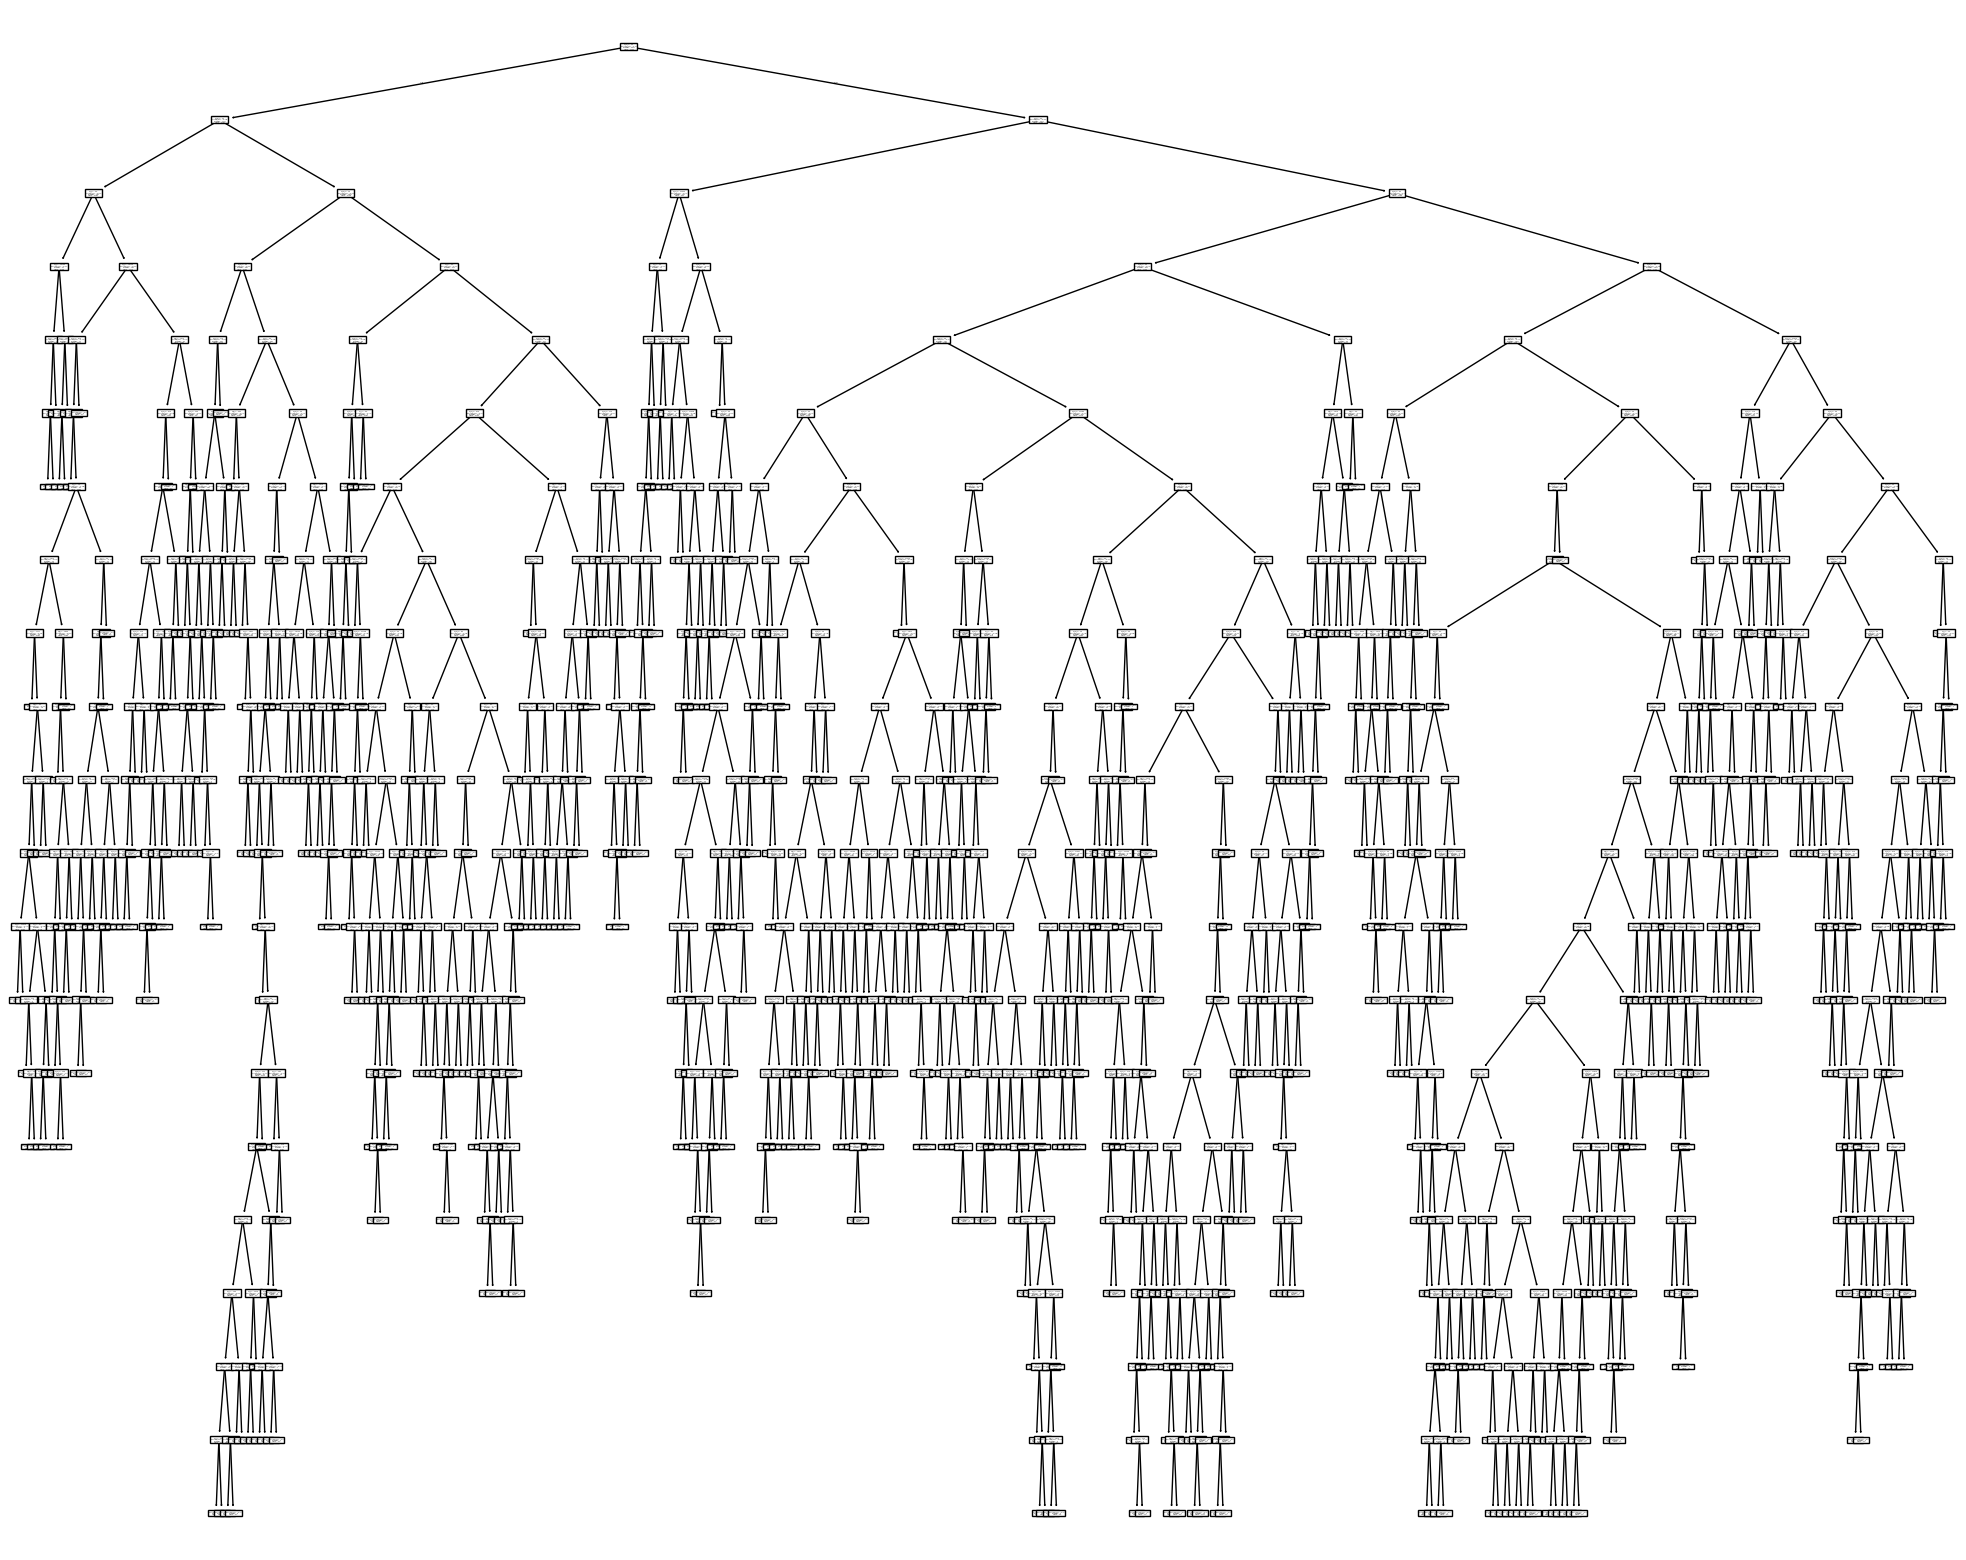

In [68]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model)